<a href="https://www.kaggle.com/code/handandegerli/flo-customer-segmentation-w-unsupervised-learning?scriptVersionId=188584510" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Business Problem:**
---
FLO segments its customers and according to these segments marketing strategies. For this purpose customers' behavior will be defined and this groups will be formed according to clusters in behaviors.

**Dataset Story:**
The dataset includes OmniChannel (both online and offline shoppers) who made their last purchase from Flo in 2020 - 2021 information obtained from the past shopping behavior of customers.

12 Variables, 19945 Observations

**master_id:** Unique customer number\
**order_channel:** Which channel of the shopping platform is used (Android, iOS, Desktop, Mobile)\
**last_order_channel:** The channel where the last purchase was made\
**first_order_date:** Customer's first purchase date\
**last_order_date:** Customer's last purchase date\
**last_order_date_online:** The date of the customer's last online purchase\
**last_order_date_offline:** The date of the customer's last offline purchase\
**order_num_total_ever_online:** Total number of purchases made by the customer on the online platform\
**order_num_total_ever_offline:** Total number of purchases the customer made offline\
**customer_value_total_ever_offline:** Total price paid by the customer for offline purchases\
**customer_value_total_ever_online:** Total price paid by the customer for online purchases\
**interested_in_categories_12:** List of categories the customer shopped in the last 12 months

In [1]:
import pandas as pd
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import numpy as np

**Step 1:** Read the file

In [2]:
df_ = pd.read_csv("/kaggle/input/flodataset/flo_data_20k.csv")


In [3]:
df = df_.copy()

In [4]:
df.head()
df.shape
df.info()
df.describe().T      # outliers 
df.isnull().sum()    # there is no misisng values

date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

df["last_order_date"].max()
analysis_date = dt.datetime(2021, 6, 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

**Step 2:** Select the variables you will use for customer segmentation.\

In [5]:
df["recency"] = (analysis_date - df["last_order_date"]).dt.days
df["tenure"] = (df["last_order_date"] - df["first_order_date"]).dt.days

model_df = df[["order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,4.0,1.0,139.99,799.38,95,119
1,19.0,2.0,159.97,1853.58,105,1469
2,3.0,2.0,189.97,395.35,186,366
3,1.0,1.0,39.99,81.98,135,11
4,1.0,1.0,49.99,159.99,86,582


### Task 1: Customer Segmentation with K-means
**Step 1:** Standardize the variables.

/tmp/ipykernel_18/2866551040.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_skew[column],color = "g")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


order_num_total_ever_online's: Skew: 10.487693811914617, : SkewtestResult(statistic=152.9996121784795, pvalue=0.0)


/tmp/ipykernel_18/2866551040.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_skew[column],color = "g")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


order_num_total_ever_offline's: Skew: 20.328068075845888, : SkewtestResult(statistic=184.13121810134328, pvalue=0.0)


/tmp/ipykernel_18/2866551040.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_skew[column],color = "g")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


customer_value_total_ever_offline's: Skew: 16.29952194789334, : SkewtestResult(statistic=173.73456097827923, pvalue=0.0)


/tmp/ipykernel_18/2866551040.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_skew[column],color = "g")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


customer_value_total_ever_online's: Skew: 20.08427979804232, : SkewtestResult(statistic=183.56317267711924, pvalue=0.0)


/tmp/ipykernel_18/2866551040.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_skew[column],color = "g")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


recency's: Skew: 0.6172488156761073, : SkewtestResult(statistic=32.86977170491703, pvalue=5.944419293752164e-237)


/tmp/ipykernel_18/2866551040.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_skew[column],color = "g")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


tenure's: Skew: 1.756242119042335, : SkewtestResult(statistic=71.08790370222574, pvalue=0.0)


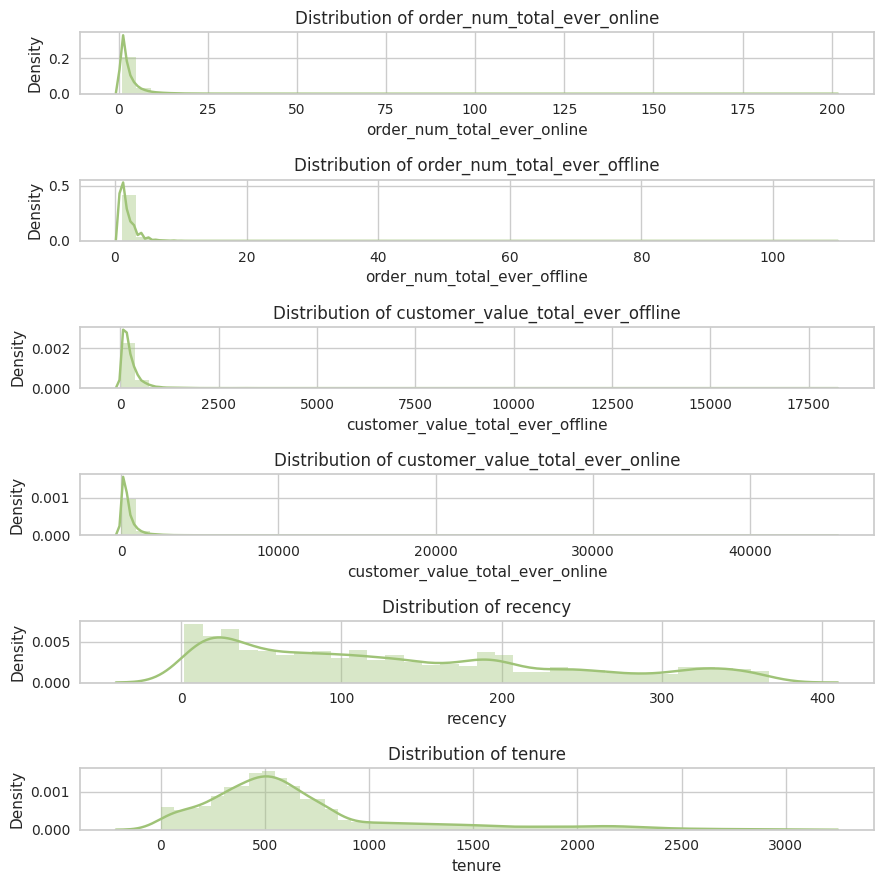

In [6]:
#SKEWNESS
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column],color = "g")
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

plt.figure(figsize=(9, 9))
plt.subplot(6, 1, 1)
check_skew(model_df,'order_num_total_ever_online')
plt.subplot(6, 1, 2)
check_skew(model_df,'order_num_total_ever_offline')
plt.subplot(6, 1, 3)
check_skew(model_df,'customer_value_total_ever_offline')
plt.subplot(6, 1, 4)
check_skew(model_df,'customer_value_total_ever_online')
plt.subplot(6, 1, 5)
check_skew(model_df,'recency')
plt.subplot(6, 1, 6)
check_skew(model_df,'tenure')
plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)
plt.show()

This code visualizes and analyzes the distributions and skewness of six different columns in the model_df dataframe. 

By examining the histogram and skewness value of each column, the extent to which the data is normally distributed is evaluated. 
Such analyses are crucial for determining the need for data transformation (e.g., log transformation or square root transformation), 
as many machine learning algorithms perform better under the assumption of normal distribution.

Let's perform logarithmic transformations based on the skewness conditions!
The logarithmic transformation of data with a wide range of values can help normalize the data and make its distribution more symmetrical. 
This enables the model to perform better.

Many statistical analyses and machine learning algorithms assume that the data is normally distributed. 
Logarithmic transformation helps data with positive skewness (right-skewed) become more symmetrical and closer to a normal distribution.

Reducing the Impact of Outliers
Logarithmic transformation minimizes the impact of large values, thus reducing the influence of outliers on the model. 
This helps in obtaining more balanced and stable models.

When taking the logarithm directly, the result is undefined for 0 or negative values. In this case, 1 is added to the data before taking the logarithm. 
This method is suitable for datasets that contain 0 values or very small positive values. The formula for the natural logarithm transformation with 1 added is: y = ln(1 + x)

In [7]:
model_df['order_num_total_ever_online']=np.log1p(model_df['order_num_total_ever_online'])
model_df['order_num_total_ever_offline']=np.log1p(model_df['order_num_total_ever_offline'])
model_df['customer_value_total_ever_offline']=np.log1p(model_df['customer_value_total_ever_offline'])
model_df['customer_value_total_ever_online']=np.log1p(model_df['customer_value_total_ever_online'])
model_df['recency']=np.log1p(model_df['recency'])
model_df['tenure']=np.log1p(model_df['tenure'])
model_df.head()

# Scaling
scale = MinMaxScaler((0,1))
#scale = StandardScaler()
model_scaling = scale.fit_transform(model_df)  #numpy arrayi döner
model_df = pd.DataFrame(model_scaling, columns= model_df.columns)
model_df.head()

/tmp/ipykernel_18/1313084127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['order_num_total_ever_online']=np.log1p(model_df['order_num_total_ever_online'])
/tmp/ipykernel_18/1313084127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['order_num_total_ever_offline']=np.log1p(model_df['order_num_total_ever_offline'])
/tmp/ipykernel_18/1313084127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,0.198755,0.000000,0.344381,0.500774,0.720607,0.597095
1,0.499459,0.101181,0.362274,0.604762,0.741210,0.909584
2,0.150352,0.101181,0.385347,0.413806,0.859241,0.736516
3,0.000000,0.000000,0.177596,0.220302,0.793028,0.309917
4,0.000000,0.000000,0.207069,0.302315,0.700139,0.794240


**Step 2:** Determine the optimal number of clusters.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

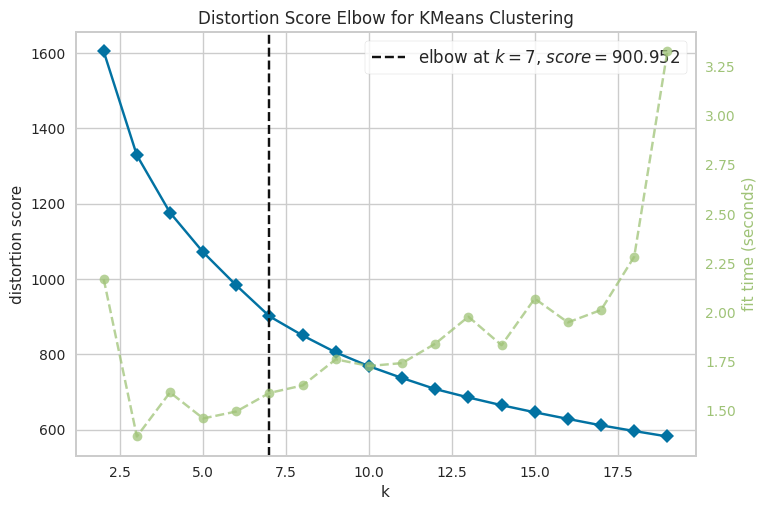

7

In [8]:
#Elbow 
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20)).fit(model_df)
elbow.show()

elbow.elbow_value_

**Step 3:** Create your model and segment your customers.

In [9]:
k_means = KMeans(n_clusters = elbow.elbow_value_, random_state = 40).fit(model_df)

k_means.cluster_centers_
k_means.inertia_
k_means.labels_

cust_segments = k_means.labels_

final_df = df[["master_id","order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
final_df["segment"] = cust_segments

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_18/403725061.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["segment"] = cust_segments


**Step 4:** Statistically analyze each segment.

In [10]:
final_df.groupby("segment").agg({"order_num_total_ever_online":["mean","min","max"],
                                  "order_num_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_online":["mean","min","max"],
                                  "recency":["mean","min","max"],
                                  "tenure":["mean","min","max","count"]})

order_num_total_ever_online             order_num_total_ever_offline  \
                               mean  min    max                         mean   
segment                                                                        
0                          1.428519  1.0    5.0                     1.277309   
1                          8.578894  2.0  200.0                     2.094368   
2                          2.168031  1.0   11.0                     2.095472   
3                          1.608318  1.0    6.0                     1.479354   
4                          1.823422  1.0   13.0                     3.758768   
5                          1.404358  1.0    8.0                     1.129540   
6                          6.440704  1.0   55.0                     1.554355   

                    customer_value_total_ever_offline                    \
         min    max                              mean     min       max   
segment                                                                   
0        1.0    5.0                        144.420486   10.00    829.98   
1        1.0   36.0                        279.118082   12.99   3589.65   
2        1.0   14.0                        293.194648   12.99   3425.14   
3        1.0    6.0                        185.852675   12.99   1406.85   
4        1.0  109.0                        549.997539  106.82  18119.14   
5        1.0    6.0                        192.605872   12.99   1333.00   
6        1.0   16.0                        186.938382   10.49   1644.79   

        customer_value_total_ever_online                       recency      \
                                    mean     min       max        mean min   
segment                                                                      
0                             211.649643   12.99   1519.17  226.035740  88   
1                            1468.613420  265.97  45220.13   32.081177   2   
2                             371.615957   23.99   3444.08   10.034370   2   
3                             249.578785   14.00   1307.33   50.543088  15   
4                             281.720345   14.99   2587.20  153.764867  22   
5                             250.505363   19.99   3476.81  139.346247   4   
6                             995.596300  180.96  12038.18  178.717109  55   

                  tenure                  
         max        mean min   max count  
segment                                   
0        367  490.117852  52  2820  5456  
1        109  966.502790  18  3034  1971  
2         27  662.656847   2  2962  1833  
3        109  604.323459  51  2828  3342  
4        366  728.281793  20  2911  3279  
5        367   37.027845   0   132   826  
6        367  947.570414  26  2964  3238

### Task 3: Customer Segmentation with Hierarchical Clustering

**Step 1:** Determine the optimal number of clusters using the standardized dataframe from Task 2.

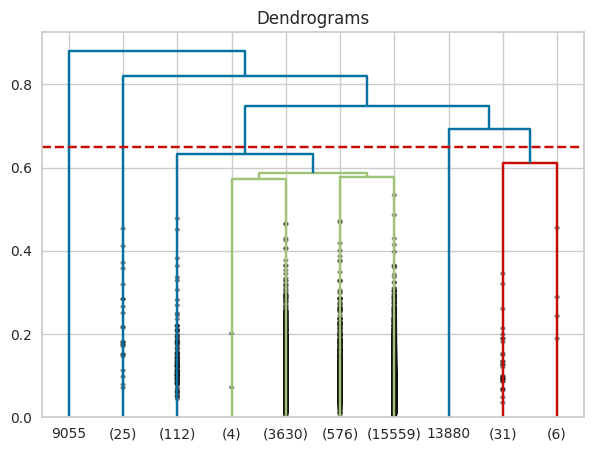

In [11]:
hc_average = linkage(model_df, 'average')

plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.axhline(y=0.65, color='r', linestyle='--')    
plt.show()

**Step 2:** Create your model and segment your customers.

In [12]:
hc = AgglomerativeClustering(n_clusters=5)
segments = hc.fit_predict(model_df)

final_df = df[["master_id","order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
final_df["segment"] = segments
final_df["segment"] = final_df["segment"] + 1
final_df.head()

/tmp/ipykernel_18/3443624036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["segment"] = segments
/tmp/ipykernel_18/3443624036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["segment"] = final_df["segment"] + 1


,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.0,1.0,139.99,799.38,95,119,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.0,2.0,159.97,1853.58,105,1469,3
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.0,2.0,189.97,395.35,186,366,1
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.0,1.0,39.99,81.98,135,11,4
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.0,1.0,49.99,159.99,86,582,1


**Step 3:** Statistically analyze each segment.

In [13]:
final_df.groupby("segment").agg({"order_num_total_ever_online":["mean","min","max"],
                                  "order_num_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_online":["mean","min","max"],
                                  "recency":["mean","min","max"],
                                  "tenure":["mean","min","max","count"]})

order_num_total_ever_online             order_num_total_ever_offline  \
                               mean  min    max                         mean   
segment                                                                        
1                          1.371099  1.0   13.0                     1.987767   
2                          3.753905  1.0   49.0                     1.816980   
3                          6.905676  1.0  200.0                     3.077212   
4                          1.396954  1.0    6.0                     1.198985   
5                          4.741056  1.0   24.0                     1.118668   

                    customer_value_total_ever_offline                   \
         min    max                              mean    min       max   
segment                                                                  
1        1.0  109.0                        261.966477  10.49  18119.14   
2        1.0   24.0                        240.983644  12.99   3425.14   
3        1.0   16.0                        427.118293  12.99   2963.24   
4        1.0    6.0                        200.690721  12.99   1019.97   
5        1.0    4.0                        123.463450  10.00   1049.92   

        customer_value_total_ever_online                       recency      \
                                    mean     min       max        mean min   
segment                                                                      
1                             208.068463   12.99  30688.47  183.027324  18   
2                             638.613773   19.99  12545.37   23.962155   2   
3                            1104.124578  139.98  45220.13  131.573873  14   
4                             227.424061   26.99   1389.60   92.515736   4   
5                             722.767938   59.98   7665.28  196.523557  36   

                  tenure                   
         max        mean  min   max count  
segment                                    
1        367  569.723219    3  2911  8747  
2        108  715.065679   18  3034  4994  
3        365  914.487062  109  3016  2396  
4        367   80.257868    0   555   985  
5        367  876.953950   71  2964  2823

**This plays an important role in defining the distance between clusters, while in hierarchical clustering, the point at which the dendrogram is cut depends on the user's decision. This can result in different numbers of clusters and therefore different outcomes.**